In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2

In [4]:
def pad(im,height,width):
    height_diff = height-im.shape[0]
    width_diff = width-im.shape[1]
    if height_diff%2 != 0:
        top = int(height_diff/2)
        bottom = int(height_diff/2)+1
    else:
        top = int(height_diff/2)
        bottom = top
    if width_diff%2 != 0:
        left = int(width_diff/2)
        right = int(width_diff/2)+1
    else:
        left = int(width_diff/2)
        right = left
    return cv2.copyMakeBorder(im,top,bottom,left,right,cv2.BORDER_CONSTANT,0)

In [25]:
cwd = os.getcwd()

In [26]:
os.chdir(cwd)

In [27]:
classes = os.listdir('../data')

In [28]:
classes

['Oat', 'Broken', 'Wheat', 'Barley', 'Rye']

In [22]:
all_file_names = []
for folder in classes:
    all_file_names.append(os.listdir('../data/'+folder))
    
for i in range(len(all_file_names)):
    for j in range(len(all_file_names[i])):
        all_file_names[i][j] = '../data/'+classes[i]+'/'+all_file_names[i][j]

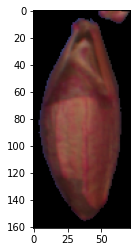

In [32]:
temp_im = np.load(all_file_names[3][1])
temp_im = temp_im[:,:,:7]/255
mask = temp_im[:,:,4].copy()
mask[temp_im[:,:,4] < 0.175] = 0
mask[temp_im[:,:,4] >= 0.175] = 1
temp_im[mask==0] = 0
plt.imshow(temp_im[:,:,[4,2,1]])
# plt.imshow(mask)
plt.show()

In [41]:
files = np.array([val for sublist in all_file_names for val in sublist])

In [53]:
class_len = []
for i in range(len(all_file_names)):
    class_len.append(len(all_file_names[i]))
labels = np.zeros((66000,5))
for i in range(class_len[0]):
    labels[i,0] = 1
for i in range(class_len[0],sum(class_len[:2])):
    labels[i,1] = 1
for i in range(sum(class_len[:2]),sum(class_len[:3])):
    labels[i,2] = 1
for i in range(sum(class_len[:3]),sum(class_len[:4])):
    labels[i,3] = 1
for i in range(sum(class_len[:4]),sum(class_len[:5])):
    labels[i,4] = 1

In [9]:
# for i in range(len(all_file_names[0])):
#     temp_im = np.load('../data/'+all_file_names[0][i])
#     plt.scatter(temp_im.shape[0],temp_im.shape[1])
# plt.show()

In [23]:
x_size = []
y_size = []
for i in range(len(all_file_names)):
     for j in range(len(all_file_names[i])):
         temp = np.load('../data/'+all_file_names[i][j])
         temp_shape = temp.shape
         x_size.append(temp_shape[0])
         y_size.append(temp_shape[1])
np.save("x_size",np.array(x_size))
np.save("y_size",np.array(y_size))
x_size = np.load("x_size.npy")
y_size = np.load("y_size.npy")

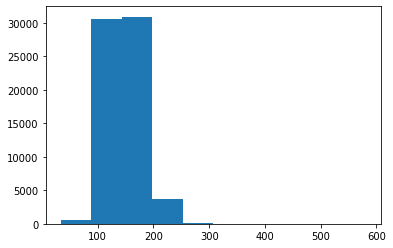

In [24]:
plt.hist(x_size)
plt.show()

In [17]:
x_size[x_size >300]

array([348, 320, 329, 304, 313, 314, 350, 338, 306, 415, 336, 368, 414,
       354, 506, 303, 374, 318, 418, 345, 312, 333, 301, 368, 399, 580,
       321, 301, 313, 313, 334, 312, 304, 332, 467, 409, 386, 316, 310,
       456, 306, 329, 374, 307, 318, 408, 330, 338, 390, 371, 312, 352,
       309, 334, 372, 348, 319, 480, 337, 327, 304, 315, 320])

In [60]:
y_size[y_size>99]

array([133, 105, 103, 102, 103, 106, 119, 100, 100, 100, 105, 100, 101,
       109])

In [83]:
np.where(x_size==320)

(array([ 1622, 35393]),)

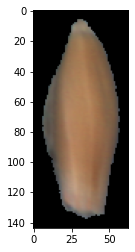

In [91]:
temp_im = np.load('../data/'+all_file_names[1][4])
temp_im[temp_im[:,:,-1] == 0] = 0
plt.imshow(temp_im[:,:,[4,2,1]])
plt.show()

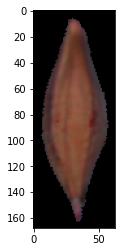

In [100]:
temp_im = np.load('../data/'+all_file_names[0][20])
temp_im[temp_im[:,:,-1] == 0] = 0
plt.imshow(temp_im[:,:,[4,2,1]])
plt.show()

In [34]:
len(all_file_names[0])

15000

In [18]:
print(np.quantile(x_size,0.999))
print(np.quantile(y_size,0.999))

297.00100000000384
89.0


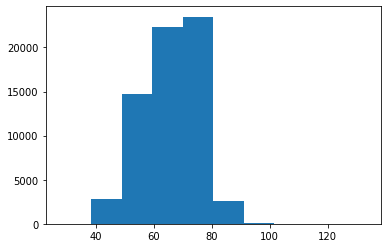

In [13]:
plt.hist(y_size)
plt.show()

In [9]:
# max_height = 0
# max_width = 0
# for i in range(len(all_file_names)):
#     for j in range(len(all_file_names[i])):
#         temp = np.load('../data/'+all_file_names[i][j])
#         if temp.shape[0] > max_height:
#             max_height = temp.shape[0]
#             height_im = (i,j)
#         if temp.shape[1] > max_width:
#             max_width = temp.shape[1]
#             width_im = (i,j)

# print("maximum height is: {height}\n maximum width is: {width}".format(height=max_height,width=max_width))
# print("Image with maximum height is: {height}\n Image with maximum width is: {width}".format(height=height_im,width=width_im))

maximum height is: 580
 maximum width is: 133
Image with maximum height is: (0, 13311)
 Image with maximum width is: (0, 2699)


maximum height is: 580

maximum width is: 133

Image with maximum height is: (0, 13311)

Image with maximum width is: (0, 2699)

In [10]:
# barley_hist = np.zeros((255,len(all_file_names[0])))
# for i in range(len(all_file_names[0])):
#     temp_im = np.load('../data/'+all_file_names[0][i])
#     temp_im[temp_im[:,:,-1] == 0] = 0
#     temp_im = temp_im[:,:,:-1]
#     barley_hist[:,i] = np.histogram(temp_im[temp_im!=0].flatten(),bins=255,range=(0,255))[0]

In [11]:
# fig,axes = plt.subplots(5,5,figsize=(15,15))
# for i in range(5):
#     for j in range(5):
#         axes[i,j].bar(np.arange(0,255),barley_hist[:,np.random.randint(barley_hist.shape[1])])
# fig.show()

In [13]:
# oat_hist = np.zeros((255,len(all_file_names[1])))
# for i in range(len(all_file_names[1])):
#     temp_im = np.load('../data/'+all_file_names[1][i])
#     temp_im[temp_im[:,:,-1] == 0] = 0
#     temp_im = temp_im[:,:,:-1]
#     oat_hist[:,i] = np.histogram(temp_im[temp_im!=0].flatten(),bins=255,range=(0,255))[0]

In [14]:
# broken_hist = np.zeros((255,len(all_file_names[2])))
# for i in range(len(all_file_names[2])):
#     temp_im = np.load('../data/'+all_file_names[2][i])
#     temp_im[temp_im[:,:,-1] == 0] = 0
#     temp_im = temp_im[:,:,:-1]
#     broken_hist[:,i] = np.histogram(temp_im[temp_im!=0].flatten(),bins=255,range=(0,255))[0]

In [15]:
# wheat_hist = np.zeros((255,len(all_file_names[3])))
# for i in range(len(all_file_names[3])):
#     temp_im = np.load('../data/'+all_file_names[3][i])
#     temp_im[temp_im[:,:,-1] == 0] = 0
#     temp_im = temp_im[:,:,:-1]
#     wheat_hist[:,i] = np.histogram(temp_im[temp_im!=0].flatten(),bins=255,range=(0,255))[0]

In [16]:
# rye_hist = np.zeros((255,len(all_file_names[4])))
# for i in range(len(all_file_names[4])):
#     temp_im = np.load('../data/'+all_file_names[4][i])
#     temp_im[temp_im[:,:,-1] == 0] = 0
#     temp_im = temp_im[:,:,:-1]
#     rye_hist[:,i] = np.histogram(temp_im[temp_im!=0].flatten(),bins=255,range=(0,255))[0]

In [23]:
# np.save("barley_hist",barley_hist)
# np.save("oat_hist",oat_hist)
# np.save("broken_hist",broken_hist)
# np.save("wheat_hist",wheat_hist)
# np.save("rye_hist",rye_hist)

In [20]:
barley_hist = np.load("barley_hist.npy")
oat_hist = np.load("oat_hist.npy")
broken_hist = np.load("broken_hist.npy")
wheat_hist = np.load("wheat_hist.npy")
rye_hist = np.load("rye_hist.npy")

In [21]:
barley_hist.shape

(255, 30000)

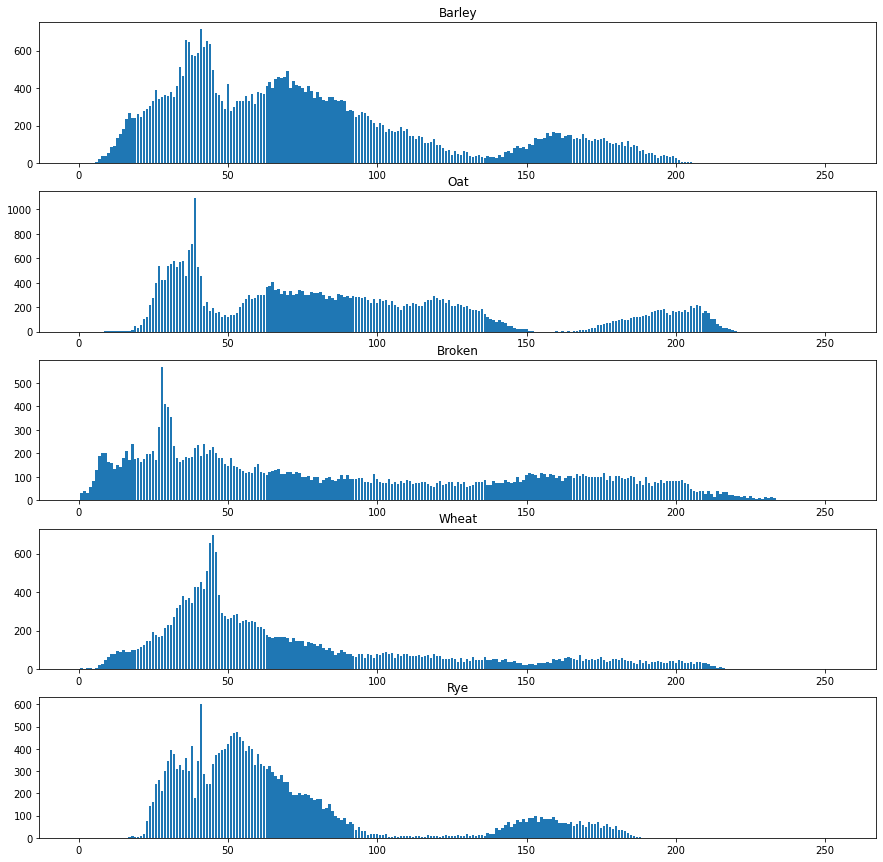

In [10]:
fig,axes = plt.subplots(5,1,figsize=(15,15))
axes[0].bar(np.arange(0,255),barley_hist[:,np.random.randint(barley_hist.shape[1])])
axes[0].set_title("Barley")
axes[1].bar(np.arange(0,255),oat_hist[:,np.random.randint(oat_hist.shape[1])])
axes[1].set_title("Oat")
axes[2].bar(np.arange(0,255),broken_hist[:,np.random.randint(broken_hist.shape[1])])
axes[2].set_title("Broken")
axes[3].bar(np.arange(0,255),wheat_hist[:,np.random.randint(wheat_hist.shape[1])])
axes[3].set_title("Wheat")
axes[4].bar(np.arange(0,255),rye_hist[:,np.random.randint(rye_hist.shape[1])])
axes[4].set_title("Rye")
fig.show()

In [13]:
all_bar = np.zeros(255)
for i in range(barley_hist.shape[1]):
    all_bar = all_bar + barley_hist[:,i]
    
all_oat = np.zeros(255)
for i in range(oat_hist.shape[1]):
    all_oat = all_oat + oat_hist[:,i]
    
all_bro = np.zeros(255)
for i in range(broken_hist.shape[1]):
    all_bro = all_bro + broken_hist[:,i]
    
all_whe = np.zeros(255)
for i in range(wheat_hist.shape[1]):
    all_whe = all_whe + wheat_hist[:,i]
    
all_rye = np.zeros(255)
for i in range(rye_hist.shape[1]):
    all_rye = all_rye + rye_hist[:,i]

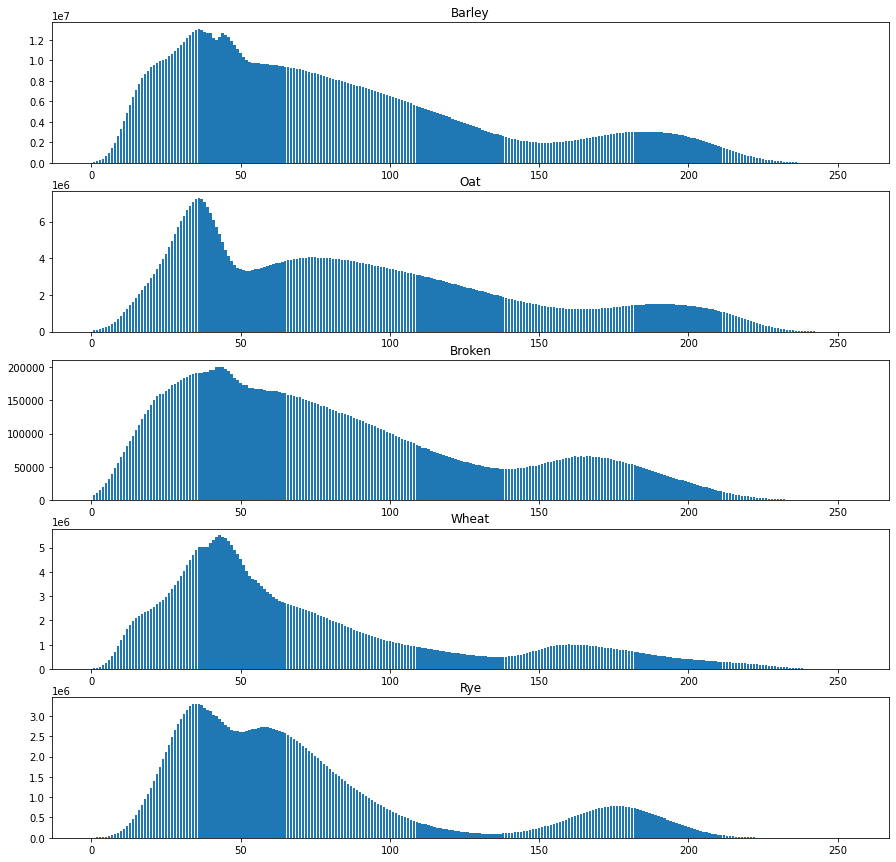

In [15]:
fig,axes = plt.subplots(5,1,figsize=(15,15))
axes[0].bar(np.arange(0,255),all_bar)
axes[0].set_title("Barley")
axes[1].bar(np.arange(0,255),all_oat)
axes[1].set_title("Oat")
axes[2].bar(np.arange(0,255),all_bro)
axes[2].set_title("Broken")
axes[3].bar(np.arange(0,255),all_whe)
axes[3].set_title("Wheat")
axes[4].bar(np.arange(0,255),all_rye)
axes[4].set_title("Rye")
# fig.savefig("Intensity_distribution")
fig.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7edbefbdd8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7edbf05518>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7edbf6d860>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7edbf05c18>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7edbf05f98>],
 'means': []}

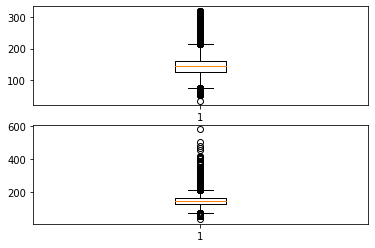

In [17]:
fig, axs = plt.subplots(2, 1)
axs[0].boxplot(x_size[x_size <= 320])
axs[1].boxplot(x_size[y_size <= 100])


In [19]:
np.shape(x_size)

(66000,)

In [54]:
Oat_Dim = np.array([x_size[:14999], y_size[:14999]])
Broken_Dim = np.array([x_size[15000:15999], y_size[15000:15999]])
Wheat_Dim = np.array([x_size[16000:26999], y_size[16000:26999]])
Barley_Dim = np.array([x_size[27000:56999], y_size[27000:56999]])
Rye_Dim = np.array([x_size[57000:66999], y_size[57000:66999]])



In [39]:
np.shape(Oat_Dim)

(2, 14999)

In [58]:
(np.mean(Oat_Dim[0]) + np.mean(Broken_Dim[0]) + np.mean(Wheat_Dim[0]) + np.mean(Barley_Dim[0]) + np.mean(Rye_Dim[0])) // 5

131.0

In [59]:
(np.mean(Oat_Dim[1]) + np.mean(Broken_Dim[1]) + np.mean(Wheat_Dim[1]) + np.mean(Barley_Dim[1]) + np.mean(Rye_Dim[1])) // 5

63.0

In [53]:
np.mean(Rye_Dim[0])

nan

In [62]:
np.sum(Barley_Dim[0] / Barley_Dim[1])/len(Barley_Dim[0])

2.1606308412486226

In [63]:
np.sum(Broken_Dim[0] / Broken_Dim[1])/len(Broken_Dim[0])

1.3264613699598873

In [64]:
np.sum(Rye_Dim[0] / Rye_Dim[1])/len(Rye_Dim[0])

2.451500335804942